<a href="https://colab.research.google.com/github/Abhipatidar22/Abhinandan-machine-learning-/blob/main/Abhinandan_VI_SEM_ANN_Neuralnetwork_for_Mnistnumber_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Mustafalw02/Machine-Learning-Lab-Work/blob/master/Neural_network_for_Mnist_number_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Loading-the-MNIST-dataset-in-Keras" data-toc-modified-id="Loading-the-MNIST-dataset-in-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the MNIST dataset in Keras</a></span></li><li><span><a href="#The-network-architecture" data-toc-modified-id="The-network-architecture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The network architecture</a></span></li><li><span><a href="#The-compilation-step" data-toc-modified-id="The-compilation-step-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The compilation step</a></span></li><li><span><a href="#Preparing-the-image-data" data-toc-modified-id="Preparing-the-image-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the image data</a></span></li><li><span><a href="#Preparing-the-labels" data-toc-modified-id="Preparing-the-labels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preparing the labels</a></span></li><li><span><a href="#Training-and-Testing" data-toc-modified-id="Training-and-Testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training and Testing</a></span></li></ul></div>

# Loading the MNIST dataset in Keras

In [1]:
from keras.datasets import mnist  #keras where all the liberariewe of the ML is Presents

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Let's build the network

# The network architecture

- The core building block of neural networks is the **layer**, a data-processing module that you can think of as a filter for data.
    - Some data goes in, and it comes out in a more useful form.
    - Layers extract **representations** (hopefully, meaningful for the data problem at hand) out of the data fed into them.
    
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive **data distillation**.
- A deep learning model is like a sieve for data-processing, made of a succession of increasingly refined data filters--**the layers**.

In [9]:
from keras import models  #Dense network using class sequential {Neuron connected with each other}
from keras import layers

In [10]:
abhinandan = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
abhinandan.add(layers.Dense(950, activation='relu', input_shape=(28 * 28, )))
abhinandan.add(layers.Dense(100, activation='relu'))
abhinandan.add(layers.Dense(64, activation='tanh'))
abhinandan.add(layers.Dense(10, activation='softmax'))
abhinandan.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 950)            │       745,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        95,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 847,964 (3.23 MB)

 Trainable params: 847,964 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

- Our network consists of a sequence of two *Dense* layers, which are densely connected (also called *fully connected*) neural layers.
- The second (and last) layer is a **10-way** *softmax* layer, which means it will return an array of **10** probability scores. Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

# The compilation step

- To make the network ready for training, we need to pick three more things, as part of the **compilation** step:
 - **A loss function**-- How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
 - **An optimizer**--The mechanism through which the network will update itself based on the data it sees and its loss function.
 - **Metrics to monitor during training and testing**--Here, we will only care about accuracy (the fraction of the images that were correctly classified).

In [11]:
abhinandan.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Preparing the image data

Before training, we will preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the $[0-1]$ interval.

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.

In [13]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

# Preparing the labels

We also need to categorically encode the labels.

In [14]:
from keras.utils import to_categorical

In [15]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Training and Testing

We are now ready to train the network, which in Keras is done via a call to the network's fit method--we fit the model to its training data:

In [17]:
abhinandan.fit(train_images, train_labels, epochs=100, batch_size=16)

Epoch 1/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8261 - loss: 0.7018
Epoch 2/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9470 - loss: 0.1879
Epoch 3/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9626 - loss: 0.1299
Epoch 4/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9730 - loss: 0.0955
Epoch 5/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9802 - loss: 0.0725
Epoch 6/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9847 - loss: 0.0601
Epoch 7/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9861 - loss: 0.0491
Epoch 8/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9901 - loss: 0.0382
Epoch 9/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9924 - loss: 0.0313
Epoch 10/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9940 - loss: 0.0260
Epoch 11/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9958 - loss: 0.0203
Epoch 12/100


- Two quantities are displayed during training:
    - The loss of the network over the training data
    - The accuracy of the network over the training data
    
- We quickly reach an accuracy of **$0.9886 (98.86\%)$** on the training data.

- Now let's check that the model performs well on the test set, too:

In [18]:
test_loss, test_acc = abhinandan.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9795 - loss: 0.0822


In [19]:
print('Test Accuracy: {:.5f} '.format(test_acc))

Test Accuracy: 0.98250 


In [20]:
test_acc

0.9825000166893005

- The test-set accuracy turns out to be $97.780\%$--that is quite a bit lower than the training set accuracy. This gap between training and test accuracy is an example of **overfitting**:the fact that the ML models tend to perform worse on new data than on their training data.

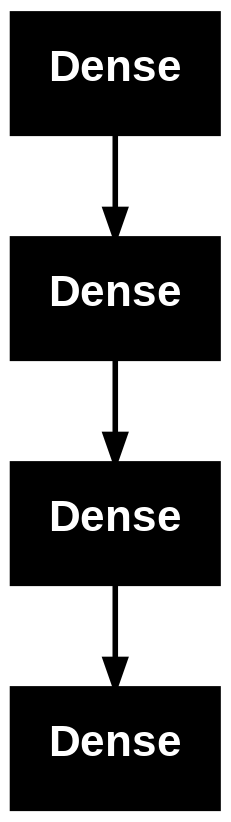

In [21]:
from keras.utils import plot_model
plot_model(abhinandan, to_file='model.png')

Epoch 1/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 1.0000 - loss: 2.5787e-04 - val_accuracy: 1.0000 - val_loss: 2.6783e-04
Epoch 2/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 2.5399e-04 - val_accuracy: 1.0000 - val_loss: 2.7030e-04
Epoch 3/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 2.5716e-04 - val_accuracy: 1.0000 - val_loss: 2.7192e-04
Epoch 4/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 1.0000 - loss: 2.4797e-04 - val_accuracy: 1.0000 - val_loss: 2.7419e-04
Epoch 5/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 2.5129e-04 - val_accuracy: 1.0000 - val_loss: 2.7577e-04
Epoch 6/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 2.4605e-04 - val_accuracy: 1.0000 - val_loss: 2.7751e-04
Epoch 7/10
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 2.4117e-04 - val_accuracy: 1.0000 - val_loss: 2.7874e-04
Epoch 8/10
1675/1675 ━━━━━━━━━

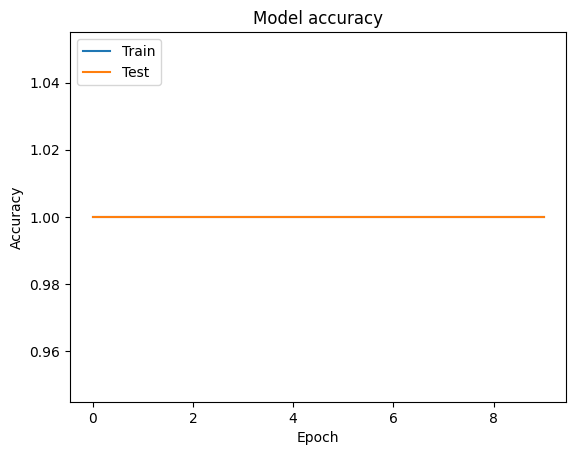

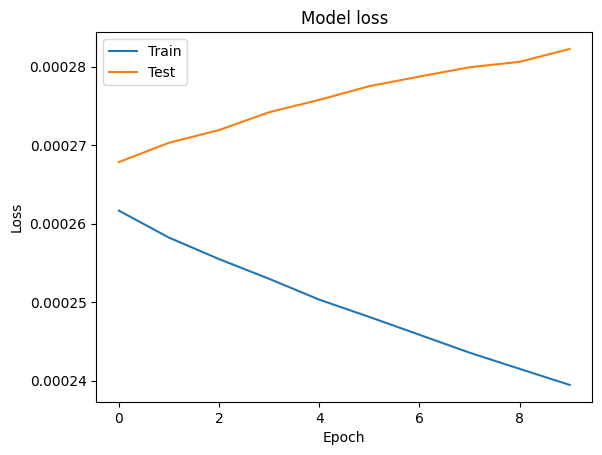

In [22]:
import matplotlib.pyplot as plt
history =abhinandan.fit(train_images, train_labels, validation_split=0.33,epochs=10, batch_size=24)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()